# Exercise 2.  Dynamic Data Structures
### Algorithms and Data Structures

by Jędrzej Kopiszka, 145304 
28.04.2020r.

## 1. Algorithm implementation 

#### 1.1 Necessary libraries

In [296]:
import random  # randomized selection of elements
import string  # creating strings for datasets
import numpy as np 
import pandas as pd  # list sotrage in DataFrames
from timeit import Timer # time measuring
import matplotlib.pyplot as plt # plotting
import seaborn as sns #plotting

#### 1.2 Generating datasets

In [297]:
def produce_name_surname_index(how_many): #function to create students 
    names= []
    surnames = []
    used_indexes= []
    
    asci = string.ascii_lowercase
    
    for j in range(how_many):
        name= ''
        surname = ''
        for i in range(12):
            name += random.choice(asci)
            surname += random.choice(asci)
        names.append(name)
        surnames.append(surname)
        rand = 0
        while(rand==0):
            rand = random.randint(1000000,9999999)
            if rand not in used_indexes:
                used_indexes.append(rand)
            else:
                rand = 0
            
    return surnames,names, used_indexes

#### 1.3 Unbalanced BST implementation
written myself based on Joe James "Python:Binary Search Tree - BST"  https://www.youtube.com/watch?v=YlgPi75hIBc

In [298]:
# Unbalanced BST
class Node:
    def __init__(self, surname, name, index):
        self.value = index
        self.surname = surname
        self.name = name
        self.leftChild = None
        self.rightChild = None
    
    def insert(self, surname, name, index):
        if self.value == index: #if Node already has what we want to insert
            return False  # we don't want duplicates
        elif self.value > index:  # if the value is less, we go to leftchild
            if self.leftChild:  # check if the left child exists
                return self.leftChild.insert(surname,name, index) 
            else:
                self.leftChild = Node(surname, name, index) # if not create one
                return True
        else:
            if self.rightChild: #chceck if exists
                return self.rightChild.insert(surname, name, index) 
            else:
                self.rightChild = Node(surname, name, index) #create if it doesnt exists
                return True
            
    def find(self, index):
        if self.value == index:
            return True
        elif self.value > index:
            if self.leftChild:
                return self.leftChild.find(index) # recursivly look for 
            else:
                return False
        else:
            if self.rightChild: #recursivly look for 
                return self.rightChild.find(index)
            else:
                return False
                 
class Tree:
    def __init__(self):
        self.root = None
        
    def insert(self, surname, name, index): #data to insert
        if self.root: #check if exists
             return self.root.insert(surname, name, index) #insert data
        else: 
            self.root = Node(surname, name, index) #if doesn't exists create new node
            return True
            
    def find(self, index): #chcek if root exists already
        if self.root:
            return self.root.find(index)
        else:
            return False
        
    def remove(self, index):
        if self.root is None: #check if tree is empty
            print('Tree empty')
            return False
        
        elif self.root.value == index: # if the data is in root node
            if self.root.leftChild is None and self.root.rightChild is None:
                self.root = None
            elif self.root.leftChild and self.root.rightChild is None:
                self.root = self.root.leftChild
            elif self.root.leftChild is None and self.root.rightChild:
                self.root = self.root.rightChild
            elif self.root.leftChild and self.root.rightChild:
                delNodeParent = self.root
                delNode = self.root.rightChild
                while delNode.leftChild:
                    delNodeParent = delNode
                    delNode = delNode.leftChild
                    
                self.root.value = delNode.value
                if delNode.rightChild:
                    if delNodeParent.value > delNode.value:
                        delNodeParent.leftChild = delNode.rightChild
                    elif delNodeParent.value < delNode.value:
                        delNodeParent.rightChild = delNode.rightChild
                else:
                    if delNode.value < delNodeParent.value:
                        delNodeParent.leftChild = None
                    else:
                        delNodeParent.rightChild = None
                        
            return True
                    
        parent = None
        node = self.root
            
        while node and node.value != index: #find node to remove
            parent = node
            if index < node.value:
                node = node.leftChild
            elif index > node.value:
                node = node.rightChild
                
        if node is None or node.value!= index: #data not found
            return False
        
        elif node.leftChild is None and node.rightChild is None: #removing node with no children
            if index < parent.value:
                parent.leftChild = None
            else:
                parent.rightChild = None
            return True
        
        elif node.leftChild and node.rightChild is None: #removing node with right child only
            if index < parent.value:
                parent.leftChild = node.leftChild
            else:
                parent.rightChild = node.leftChild
            return True

        elif node.leftChild is None and node.rightChild: #removing node left child only
            if index < parent.value:
                parent.leftChild = node.rightChild
            else:
                parent.rightChild = node.rightChild
            return True
        
        else:
            delNodeParent = node
            delNode = node.rightChild
            while delNode.leftChild:
                delNodeParent = delNode
                delNode = delNode.leftChild
            
            node.value = delNode.value
            if delNode.rightChild:
                if delNodeParent.value > delNode.value:
                    delNodeParent.leftChild = delNode.rightChild
                elif delNodeParent.value < delNode.value:
                    delNodeParent.rightChild = delNode.rightChild
            else:
                if delNode.value < delNodeParent.value:
                    delNodeParent.leftChild = None
                else:
                    delNodeParent.rightChild = None

#### 1.4 AVL - self-balancing BST
written by myself, based on Brian Faure "AVL Tree: Background & Python Code" https://www.youtube.com/watch?v=lxHF-mVdwK8

In [299]:
#auto-balancing BST - AVL
class node:
    def __init__(self, surname, name, value=None):
        self.value = value
        self.surname = surname
        self.name = name
        self.left_child = None
        self.right_child = None
        self.parent = None 
        self.height = 1  # height of node in tree (max dist. to leaf) NEW FOR AVL


class AVLTree:
    def __init__(self):
        self.root = None

    def insert(self, surname, name, value):
        if self.root == None:
            self.root = node(surname, name, value)
        else:
            self._insert(value, self.root, surname, name)

    def _insert(self, value, cur_node, surname, name):
        if value < cur_node.value:
            if cur_node.left_child == None:
                cur_node.left_child = node(surname, name, value)
                cur_node.left_child.parent = cur_node  # set parent
                self._inspect_insertion(cur_node.left_child)
            else:
                self._insert(value, cur_node.left_child, surname, name)
        elif value > cur_node.value:
            if cur_node.right_child == None:
                cur_node.right_child = node(surname, name, value)
                cur_node.right_child.parent = cur_node  # set parent
                self._inspect_insertion(cur_node.right_child)
            else:
                self._insert(value, cur_node.right_child, surname, name)
        else:
            return False


    def height(self):
        if self.root != None:
            return self._height(self.root, 0)
        else:
            return 0

    def _height(self, cur_node, cur_height):
        if cur_node == None: return cur_height
        left_height = self._height(cur_node.left_child, cur_height + 1)
        right_height = self._height(cur_node.right_child, cur_height + 1)
        return max(left_height, right_height)

    def find(self, value):
        if self.root != None:
            return self._find(value, self.root)
        else:
            return None

    def _find(self, value, cur_node):
        if value == cur_node.value:
            return cur_node
        elif value < cur_node.value and cur_node.left_child != None:
            return self._find(value, cur_node.left_child)
        elif value > cur_node.value and cur_node.right_child != None:
            return self._find(value, cur_node.right_child)

    def delete_value(self, value):
        return self.delete_node(self.find(value))

    def delete_node(self, node):

        if node == None or self.find(node.value) == None:
            return None


        def min_value_node(n):
            current = n
            while current.left_child != None:
                current = current.left_child
            return current

        def num_children(n):
            num_children = 0
            if n.left_child != None: num_children += 1
            if n.right_child != None: num_children += 1
            return num_children

        node_parent = node.parent
        node_children=num_children(node)
        if node_children == 0:

            if node_parent != None:
                if node_parent.left_child == node:
                    node_parent.left_child = None
                else:
                    node_parent.right_child = None
            else:
                self.root = None

        if node_children == 1:

            if node.left_child != None:
                child = node.left_child
            else:
                child = node.right_child

            if node_parent != None:
       
                if node_parent.left_child == node:
                    node_parent.left_child = child
                else:
                    node_parent.right_child = child
            else:
                self.root = child

            child.parent = node_parent

        if node_children == 2:
            successor = min_value_node(node.right_child)
            node.value = successor.value
            self.delete_node(successor)
            return

        if node_parent != None:
            node_parent.height = 1 + max(self.get_height(node_parent.left_child),
                                         self.get_height(node_parent.right_child))
            self._inspect_deletion(node_parent)

    def search(self, value):
        if self.root != None:
            return self._search(value, self.root)
        else:
            return False

    def _search(self, value, cur_node):
        if value == cur_node.value:
            return True
        elif value < cur_node.value and cur_node.left_child != None:
            return self._search(value, cur_node.left_child)
        elif value > cur_node.value and cur_node.right_child != None:
            return self._search(value, cur_node.right_child)
        return False

    def _inspect_insertion(self, cur_node, path=[]):
        if cur_node.parent == None: return
        path = [cur_node] + path

        left_height = self.get_height(cur_node.parent.left_child)
        right_height = self.get_height(cur_node.parent.right_child)

        if abs(left_height - right_height) > 1:
            path = [cur_node.parent] + path
            self._rebalance_node(path[0], path[1], path[2])
            return

        new_height = 1 + cur_node.height
        if new_height > cur_node.parent.height:
            cur_node.parent.height = new_height

        self._inspect_insertion(cur_node.parent, path)

    def _inspect_deletion(self, cur_node):
        if cur_node == None: return

        left_height = self.get_height(cur_node.left_child)
        right_height = self.get_height(cur_node.right_child)

        if abs(left_height - right_height) > 1:
            y = self.taller_child(cur_node)
            x = self.taller_child(y)
            self._rebalance_node(cur_node, y, x)

        self._inspect_deletion(cur_node.parent)

    def _rebalance_node(self, z, y, x):
        if y == z.left_child and x == y.left_child:
            self._right_rotate(z)
        elif y == z.left_child and x == y.right_child:
            self._left_rotate(y)
            self._right_rotate(z)
        elif y == z.right_child and x == y.right_child:
            self._left_rotate(z)
        elif y == z.right_child and x == y.left_child:
            self._right_rotate(y)
            self._left_rotate(z)
        else:
            raise Exception('_rebalance_node: z,y,x node configuration not recognized!')


    def _right_rotate(self, z):
        sub_root = z.parent
        y = z.left_child
        t3 = y.right_child
        y.right_child = z
        z.parent = y
        z.left_child = t3
        if t3 != None: t3.parent = z
        y.parent = sub_root
        if y.parent == None:
            self.root = y
        else:
            if y.parent.left_child == z:
                y.parent.left_child = y
            else:
                y.parent.right_child = y
        z.height = 1 + max(self.get_height(z.left_child),
                           self.get_height(z.right_child))
        y.height = 1 + max(self.get_height(y.left_child),
                           self.get_height(y.right_child))


    def _left_rotate(self, z):
        sub_root = z.parent
        y = z.right_child
        t2 = y.left_child
        y.left_child = z
        z.parent = y
        z.right_child = t2
        if t2 != None: t2.parent = z
        y.parent = sub_root
        if y.parent == None:
            self.root = y
        else:
            if y.parent.left_child == z:
                y.parent.left_child = y
            else:
                y.parent.right_child = y
        z.height = 1 + max(self.get_height(z.left_child),
                           self.get_height(z.right_child))
        y.height = 1 + max(self.get_height(y.left_child),
                           self.get_height(y.right_child))


    def get_height(self, cur_node):
        if cur_node == None: return 0
        return cur_node.height


    def taller_child(self, cur_node):
        left = self.get_height(cur_node.left_child)
        right = self.get_height(cur_node.right_child)
        return cur_node.left_child if left >= right else cur_node.right_child


#### 1.5  Functions helpful in appending, searching, deleting 

In [332]:
def find_dol(dol, index):
    for element in dol:
        if element[0] == index:
            return True
    else:
        return False
    
def delete_dol(dol, index):
    for element in dol:
        if element[0] == index:
            dol.remove(element)
    return dol

def append_from_list(dol, temporary_list):
    for student in temporary_list:
        dol.append([student[2], student[0], student[1]])
    return dol

In [301]:
def append_bst(tree, temporary_list): #insert 3 elements to BST line by line
    for student in temporary_list:
        tree.insert(student[0], student[1], student[2])
    return tree

In [302]:
def append_avl(tree, temporary_list): # insert 3 elements to AVL line by line
    for student in temporary_list:
        tree.insert(student[0], student[1], student[2])
    return tree


#### 1.6 Writing to file, creating CSV dataset 

In [303]:
file = open('dataset.csv', 'w') # create dataset

surnames, names, indexes = produce_name_surname_index(58000) #max length of dataset = 58000 samples
for line in range(58000):
    student = surnames[line] + ',' + names[line] + ',' + str(indexes[line]) + '\n'
    file.write(student)
print('done')

done


#### 1.7 Reading from CSV dataset, storing data temporarly in list of lists

In [304]:
temporary_storing=[]
file = open('dataset.csv', 'r')
lines = file.readlines()
for line in lines:
    temporary_storing.append([line.split(',')[0], line.split(',')[1], int(line.strip('\n').split(',')[2])]) #appending 
file.close()

## 2 Time-measuring 

### 2.1 Storing data in data structures

#### 2.1.1 Storing in list - list of lists where first element is an index, second a surname, third name

In [356]:
dataset_len=list(np.arange(1000, 58001, 3000))
times_dict_addition={}
print('Inserted into list for: ')
for length in dataset_len:
    times_dict_addition[length]=[]
    dic=[]
    t = Timer(lambda:append_from_list(dic, temporary_storing[:length]))
    times_dict_addition[length].append(t.timeit(number = 10)/10)
    print(length, end=', ')

Inserted into list for: 
1000, 4000, 7000, 10000, 13000, 16000, 19000, 22000, 25000, 28000, 31000, 34000, 37000, 40000, 43000, 46000, 49000, 52000, 55000, 58000, 

#### 2.1.2 Storing in Binary Search Tree

In [357]:
print('Inserted into BST for: ')
for length in dataset_len:
    unbalanced_tree = Tree()
    t = Timer(lambda:append_bst(unbalanced_tree, temporary_storing[:length]))
    times_dict_addition[length].append(t.timeit(number = 10)/10)
    print(length, end=',')

Inserted into BST for: 
1000,4000,7000,10000,13000,16000,19000,22000,25000,28000,31000,34000,37000,40000,43000,46000,49000,52000,55000,58000,

#### 2.1.2 Storing in AVL

In [358]:
print('Inserted into AVL for: ')
for length in dataset_len:
    balanced_tree = AVLTree()
    t = Timer(lambda:append_avl(balanced_tree, temporary_storing[:length]))
    times_dict_addition[length].append(t.timeit(number = 10)/10)
    print(length, end=',')

Inserted into AVL for: 
1000,4000,7000,10000,13000,16000,19000,22000,25000,28000,31000,34000,37000,40000,43000,46000,49000,52000,55000,58000,

### 2.2 Removing every element one by one -  measuring mean deletion time for each record

#### 2.2.1 Removing from list

In [361]:
times_dict_deletion={}
print('Deleted from list for: ')
for length in dataset_len:
    times_dict_deletion[length]=[]
    dic2=[]
    dic2 = append_from_list(dic2, temporary_storing[:length])
    times=[]
    while(len(dic2)!=0):
        chosen_randomly = random.choice([i[0] for i in dic2])
        t = Timer(lambda:delete_dol(dic2, chosen_randomly))
        times.append(t.timeit(number = 1)/1)
    times_dict_deletion[length].append(np.mean(times)) #mean of times needed to delete one element during deletion of all 
    print(length, end=', ')

Deleted from list for: 
1000, 4000, 7000, 10000, 13000, 16000, 19000, 22000, 25000, 28000, 31000, 34000, 37000, 40000, 43000, 46000, 49000, 52000, 55000, 58000, 

#### 2.2.2 Removing from BST

In [362]:
print('Deleted from BST for: ')
for length in dataset_len:
    unbalanced_tree2 = Tree()
    tree2 = append_bst(unbalanced_tree2, temporary_storing[:length])
    times=[]
    dic2=[]
    dic2 = append_from_list(dic2, temporary_storing[:length])
    dic2 = [i[0] for i in dic2]
    while(len(dic2)!=0):
        chosen_randomly = random.choice(dic2)
        dic2.remove(chosen_randomly)
        t = Timer(lambda:tree2.remove(chosen_randomly))
        times.append(t.timeit(number = 1)/1)
    print(length, end=', ')
    times_dict_deletion[length].append(np.mean(times)) #mean of times needed to delete one element during deletion of all 

Deleted from BST for: 
1000, 4000, 7000, 10000, 13000, 16000, 19000, 22000, 25000, 28000, 31000, 34000, 37000, 40000, 43000, 46000, 49000, 52000, 55000, 58000, 

#### 2.2.3 Removing from AVL

In [364]:
print('Deleted from AVL for: ')
for length in dataset_len:
    balanced_tree2 = AVLTree()
    tree2 = append_avl(balanced_tree2, temporary_storing[:length])
    times=[]
    dic2=[]
    dic2 = append_from_list(dic2, temporary_storing[:length])
    dic2 = [i[0] for i in dic2]
    while(len(dic2)!=0):
        chosen_randomly = random.choice(dic2)
        dic2.remove(chosen_randomly)
        t = Timer(lambda:tree2.delete_value(chosen_randomly))
        times.append(t.timeit(number = 1)/1)
    print(length, end=', ')
    times_dict_deletion[length].append(np.mean(times)) #mean of times needed to delete one element during deletion of all 

Deleted from AVL for: 
1000, 4000, 7000, 10000, 13000, 16000, 19000, 22000, 25000, 28000, 31000, 34000, 37000, 40000, 43000, 46000, 49000, 52000, 55000, 58000, 

### 2.3 Searching for each element one by one -  measuring mean searching time for each record

#### 2.3.1 Searching inside dictionary

In [347]:
times_dict_search={}
print('Found in dictionary for: ')
for length in dataset_len:
    i=0
    times_dict_search[length]=[]
    dic3=[]
    dic3 = append_from_list(dic3, temporary_storing[:length])
    times=[]
    not_searched=[i[0] for i in dic3]
    while(len(not_searched)!=0):
        chosen_randomly = random.choice(not_searched)
        not_searched.remove(chosen_randomly)
        t = Timer(lambda:find_dol(dic3, chosen_randomly))
        times.append(t.timeit(number = 3)/3)
        i+=1
    times_dict_search[length].append(np.mean(times)) #mean of times needed to delete one element during deletion of all 
    print(length, end=', ')

Found in dictionary for: 
1000, 4000, 7000, 10000, 13000, 16000, 19000, 22000, 25000, 28000, 31000, 34000, 37000, 40000, 43000, 46000, 49000, 52000, 55000, 58000, 

#### 2.3.2 Searching in BST

In [349]:
print('Found in BST for: ')
for length in dataset_len:
    dic3=[]
    dic3 = append_from_list(dic3, temporary_storing[:length])
    times=[]
    unbalanced_tree3 = Tree()
    tree3 = append_bst(unbalanced_tree3, temporary_storing[:length])
    not_searched=[i[0] for i in dic3]
    while(len(not_searched)!=0):
        chosen_randomly = random.choice(not_searched)
        not_searched.remove(chosen_randomly)
        t = Timer(lambda:tree3.find(chosen_randomly))
        times.append(t.timeit(number = 3)/3)
    times_dict_search[length].append(np.mean(times)) #mean of times needed to delete one element during deletion of all 
    print(length, end=', ')

Found in BST for: 
1000, 4000, 7000, 10000, 13000, 16000, 19000, 22000, 25000, 28000, 31000, 34000, 37000, 40000, 43000, 46000, 49000, 52000, 55000, 58000, 

#### 2.3.3 Searching in AVL

In [350]:
print('Found in AVL for: ')
for length in dataset_len:
    dic3=[]
    dic3 = append_from_list(dic3, temporary_storing[:length])
    times=[]
    balanced_tree3 = AVLTree()
    tree = append_avl(balanced_tree3, temporary_storing[:length])
    not_searched=[i[0] for i in dic3]
    while(len(not_searched)!=0):
        chosen_randomly = random.choice(not_searched)
        not_searched.remove(chosen_randomly)
        t = Timer(lambda:tree.search(chosen_randomly))
        times.append(t.timeit(number = 3)/3)
    times_dict_search[length].append(np.mean(times)) #mean of times needed to delete one element during deletion of all 
    print(length, end=', ')

Found in AVL for: 
1000, 4000, 7000, 10000, 13000, 16000, 19000, 22000, 25000, 28000, 31000, 34000, 37000, 40000, 43000, 46000, 49000, 52000, 55000, 58000, 

#### 2.3.4 Storing results in DataFrames

In [365]:
search_time = pd.DataFrame.from_dict(orient='index', data=times_dict_search, columns=['Ordered list', 'Binary Search Tree', 'Balanced BST'])
remove_time = pd.DataFrame.from_dict(orient='index', data=times_dict_deletion, columns=['Ordered list', 'Binary Search Tree', 'Balanced BST'])
insertion_time = pd.DataFrame.from_dict(orient='index', data=times_dict_addition, columns=['Ordered list', 'Binary Search Tree','Balanced BST'])

# 3. Plots and conclusions

### 3.1 Insertion time for different sizes of datasets, which are being stored using 3 techniques

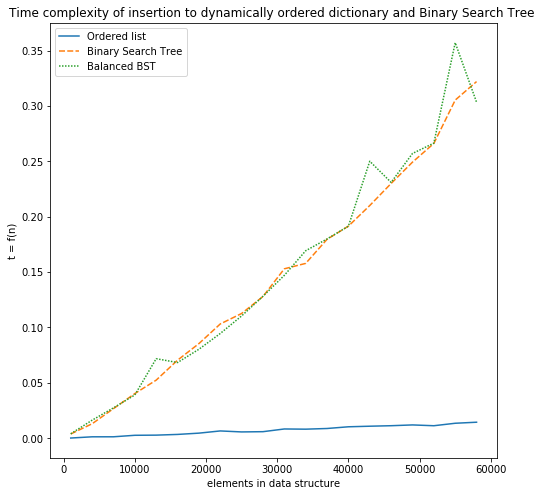

In [360]:
plt.figure(figsize=(8,8))
sns.lineplot(data=insertion_time)
plt.title('Time complexity of insertion to dynamically ordered dictionary and Binary Search Tree ')
plt.xlabel('elements in data structure')
plt.ylabel('t = f(n)')
plt.show()

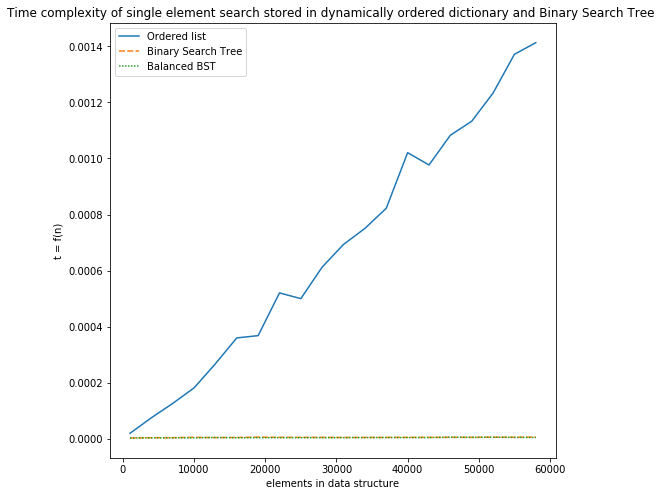

In [354]:
plt.figure(figsize=(8,8))
sns.lineplot(data=search_time)
plt.title('Time complexity of single element search stored in dynamically ordered dictionary and Binary Search Tree ')
plt.xlabel('elements in data structure')
plt.ylabel('t = f(n)')
plt.show()

Text(0, 0.5, 't = f(n)')

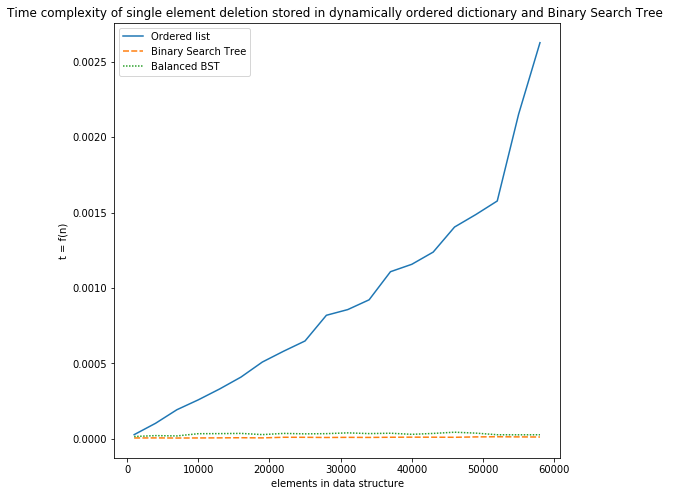

In [366]:
plt.figure(figsize=(8,8))
sns.lineplot(data=remove_time)
plt.title('Time complexity of single element deletion stored in dynamically ordered dictionary and Binary Search Tree ')
plt.xlabel('elements in data structure')
plt.ylabel('t = f(n)')

### 3.2 Conclusions on time complexity
Let's begin with Binary trees. Mean time complexity of BST is heavily dependent on mean hight of the tree. Best times can be reached on balanced trees – left and right branch contains equal amount of elements, therefore the least amount of comparisons is needed due to specific way of creating that data structure – left node contains smaller element, right node contains bigger.  That rule applies to all basic operations on trees – insertion, search, deletion. Average time complexity of basic operation is O(log n), worst case O(n). 

Node deletion, despite low time complexity is much more advanced – it demands taking into consideration different cases (element we search is a root, a node with or without child/children). Insertion to BST is fairly simple, works similarly to search – starts from root and enters left/right node by making comparison. This, smarter, way of accessing elements resulting in lesser amount of comparison makes BST more efficient than linear searching on ordered array.
 